Found 1348 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


Epoch 1/30


2025-04-27 18:43:52.653070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


43/43 [==============================] - ETA: 0s - loss: 2.4699 - accuracy: 0.5193

2025-04-27 18:44:22.960865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


43/43 [==============================] - 33s 763ms/step - loss: 2.4699 - accuracy: 0.5193 - val_loss: 0.7028 - val_accuracy: 0.5031
Epoch 2/30
43/43 [==============================] - 32s 751ms/step - loss: 0.8461 - accuracy: 0.5534 - val_loss: 1.0070 - val_accuracy: 0.5000
Epoch 3/30
43/43 [==============================] - 32s 758ms/step - loss: 0.8134 - accuracy: 0.5037 - val_loss: 0.7071 - val_accuracy: 0.5594
Epoch 4/30
43/43 [==============================] - 33s 766ms/step - loss: 0.7506 - accuracy: 0.5935 - val_loss: 0.9580 - val_accuracy: 0.5281
Epoch 5/30
43/43 [==============================] - 32s 760ms/step - loss: 0.7113 - accuracy: 0.6469 - val_loss: 0.7766 - val_accuracy: 0.5281
Epoch 6/30
43/43 [==============================] - 32s 756ms/step - loss: 0.6185 - accuracy: 0.6788 - val_loss: 0.8056 - val_accuracy: 0.5906
Epoch 7/30
43/43 [==============================] - 34s 767ms/step - loss: 0.5926 - accuracy: 0.6736 - val_loss: 0.6313 - val_accuracy: 0.6344
Epoch 8/30

2025-04-27 19:01:00.350120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 104ms/step


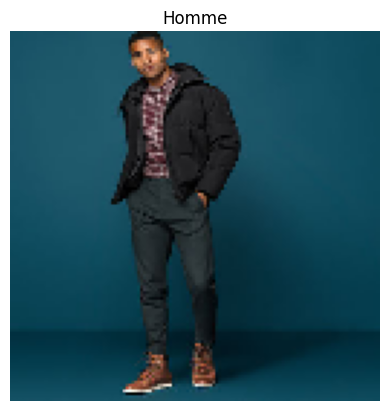

Score de certitude : 0.0143


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Définir les chemins vers les dossiers
train_dir = '/Users/macbookair/Documents/Deep_Learning/Homme_Femme/dataset/training_set'  # Dossier d'entraînement
test_dir = '/Users/macbookair/Documents/Deep_Learning/Homme_Femme/dataset/test_set'    # Dossier de test

# Préparation des générateurs d'images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'  # Deux classes : homme ou femme
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

# Construction du modèle
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),  # Ajout d'une couche plus profonde
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Dropout pour éviter le sur-apprentissage
    Dense(1, activation='sigmoid')
])

# Compilation du modèle
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator
)

# Sauvegarder le modèle entraîné
model.save('modele_homme_femme.h5')

# -------------------------------------------------
# Maintenant, tester sur quelques images de test :
# -------------------------------------------------

# Charger à nouveau une image de test manuellement pour prédire
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Exemple : chemin d'une image à tester
image_path = '/Users/macbookair/Documents/Deep_Learning/Homme_Femme/dataset/test_set/men/37.jpg'  # Remplace par une vraie image de test

# Charger l'image
img = load_img(image_path, target_size=(128, 128))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Faire la prédiction
prediction = model.predict(img_array)

# Afficher l'image avec le résultat
plt.imshow(img)
plt.axis('off')
plt.title('Homme' if prediction[0][0] < 0.5 else 'Femme')
plt.show()

# Afficher le score
print(f"Score de certitude : {prediction[0][0]:.4f}")


